In [1]:
import h5py
import numpy as np
import math
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as spline
from scipy.fftpack import fft, fftshift ,ifft,rfft,fftfreq,rfftfreq
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c
Frequency=1/Time

In [2]:
EOS=['ALF2','APR4','GAM2','GNH3','H4','SLy']
MASS=['1200','1225','1250','1275','1300','1325','1350','1375','1400','1425','1450','1475','1500']
Q=['10','08','09']
point=['5000','4500','4000','3500','3000','2500','2000','1500','1000','500']

Define the functions to do the analysis

In [3]:
def fre_do(x,y,mass):
    fd=fft(y)
    N=len(y)
    if (N % 2) == 1:
        N=N+1
    T=x[1]-x[0]
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    fq=fftfreq(len(y))
    mask=fq>=0
    fd=2.0*(fd/N)
    fd=fd[mask]
    fd=abs(fd)
    return xf,fd
    

In [4]:
def analyze(rhM,time,mass):
    
    
    
    peaks,prop=scipy.signal.find_peaks(abs(rhM))
    ampls=rhM[peaks]
    merg=np.amax(abs(ampls))
    merg=np.where(abs(ampls)==merg)
    merg=int(merg[0])
    t1=peaks[merg]
    
    for mj in range(len(time)):
        if time[mj]>0.0:
            flag='pos'
            t0=mj
            break
        
    ampl=rhM[t0:]
    tim=time[t0:]
    
    #ampl=rhM
    #tim=time
    
    tuk=signal.tukey(len(ampl),0.03)
    dat=ampl*tuk
    
    fq,fd=fre_do(tim,dat,mass)
    
    mx=np.where(fd==np.amax(fd))[0][0]
    freq=fq[mx]
    amp=fd[mx]
    
    return fq,fd,tim,dat
    

#### Example

In [5]:
nam='data/ALF2-q10-M1200.h_l2_m2.r500.t-1500_5000.dat'
f=open(nam,'r')
lines=f.readlines()[13:]

result1=[]
result2=[]
result3=[]

for x in lines:
    for i in range(len(x.split(' '))):
        if x.split(' ')[i]!='':
            result1.append(x.split(' ')[i])
            for j in range(i+1,len(x.split(' '))): 
                if x.split(' ')[j]!='':
                    result2.append(x.split(' ')[j])
                    for k in range(j+1,len(x.split(' '))):
                        if x.split(' ')[k]!='':
                            result3.append(x.split(' ')[k])
                            break
                    break
            break

time=[float(i) for i in result1]
rh1=[float(i) for i in result2]
rh2=[float(i) for i in result3]

rh=np.empty(len(rh1))
for i in range(len(rh1)):
    rh[i]=rh1[i]+rh2[i]

In [6]:
for i in range(len(rh1)):
    print(result1[i],result2[i],result3[i])

-1.5001531748671e+03 1.0873984065603e-01 2.9344871526902e-01

-1.4984731748671e+03 9.8001349006850e-02 2.9726529480050e-01

-1.4967931748671e+03 8.7128790773505e-02 3.0069058745631e-01

-1.4951131748671e+03 7.6136288070515e-02 3.0371971852289e-01

-1.4934331748671e+03 6.5038142513830e-02 3.0634832487561e-01

-1.4917531748671e+03 5.3848816831355e-02 3.0857256339619e-01

-1.4900731748671e+03 4.2582915873941e-02 3.1038911950824e-01

-1.4883931748671e+03 3.1255167248385e-02 3.1179521496675e-01

-1.4867131748671e+03 1.9880401854435e-02 3.1278861419510e-01

-1.4850331748671e+03 8.4735345637860e-03 3.1336762884204e-01

-1.4833531748671e+03 -2.9504549448718e-03 3.1353112076524e-01

-1.4816731748671e+03 -1.4376541376995e-02 3.1327850397120e-01

-1.4799931748671e+03 -2.5789673309548e-02 3.1260974607635e-01

-1.4783131748671e+03 -3.7174793168891e-02 3.1152536960498e-01

-1.4766331748671e+03 -4.8516857702341e-02 3.1002645306725e-01

-1.4749531748671e+03 -5.9800858784915e-02 3.0811463147724e-01

-1


-5.8959317486711e+02 -2.5447111085244e-01 -2.5478822776337e-01

-5.8791317486711e+02 -2.4318625955629e-01 -2.6573995516483e-01

-5.8623317486711e+02 -2.3142364928463e-01 -2.7619944048105e-01

-5.8455317486711e+02 -2.1920467465169e-01 -2.8614572024414e-01

-5.8287317486711e+02 -2.0655165430323e-01 -2.9555873534119e-01

-5.8119317486711e+02 -1.9348779112204e-01 -3.0441936879785e-01

-5.7951317486711e+02 -1.8003713123287e-01 -3.1270948274428e-01

-5.7783317486711e+02 -1.6622452231003e-01 -3.2041195504061e-01

-5.7615317486711e+02 -1.5207557130378e-01 -3.2751071561451e-01

-5.7447317486711e+02 -1.3761660126243e-01 -3.3399078205018e-01

-5.7279317486711e+02 -1.2287460670579e-01 -3.3983829364079e-01

-5.7111317486711e+02 -1.0787720708266e-01 -3.4504054306756e-01

-5.6943317486711e+02 -9.2652598216360e-02 -3.4958600514320e-01

-5.6775317486711e+02 -7.7229502053215e-02 -3.5346436253294e-01

-5.6607317486711e+02 -6.1637115256305e-02 -3.5666652883201e-01

-5.6439317486711e+02 -4.5905057140916e-

3.4112682513289e+02 -7.6883596725060e-02 -2.3457823174977e-01

3.4280682513289e+02 -4.7545923736665e-02 -2.3864234796108e-01

3.4448682513289e+02 -1.8162710088892e-02 -2.3904774290479e-01

3.4616682513289e+02 1.0802554959507e-02 -2.3581653302229e-01

3.4784682513289e+02 3.8886651398793e-02 -2.2903171562192e-01

3.4952682513289e+02 6.5635387054225e-02 -2.1883867837546e-01

3.5120682513289e+02 9.0613073399820e-02 -2.0544497830919e-01

3.5288682513289e+02 1.1341229506897e-01 -1.8911823472533e-01

3.5456682513289e+02 1.3366350830415e-01 -1.7018213791153e-01

3.5624682513289e+02 1.5104401893384e-01 -1.4901071091744e-01

3.5792682513289e+02 1.6528594828006e-01 -1.2602105787265e-01

3.5960682513289e+02 1.7618287632180e-01 -1.0166488390267e-01

3.6128682513289e+02 1.8359493843906e-01 -7.6419084871015e-02

3.6296682513289e+02 1.8745223469039e-01 -5.0775693742040e-02

3.6464682513289e+02 1.8775648499929e-01 -2.5231450467519e-02

3.6632682513289e+02 1.8458092957978e-01 -2.7724690573649e-04

3.680

1.3961668251329e+03 -4.1198752659713e-02 1.1031317935333e-01

1.3978468251329e+03 -5.4600914710140e-02 1.0442905388570e-01

1.3995268251329e+03 -6.7185010554060e-02 9.6925740695550e-02

1.4012068251329e+03 -7.8756341612275e-02 8.7913814957855e-02

1.4028868251329e+03 -8.9135102744630e-02 7.7527191588600e-02

1.4045668251329e+03 -9.8159029083435e-02 6.5921058092200e-02

1.4062468251329e+03 -1.0568577372054e-01 5.3269557181705e-02

1.4079268251329e+03 -1.1159503022931e-01 3.9763257177345e-02

1.4096068251329e+03 -1.1579040098108e-01 2.5606426496510e-02

1.4112868251329e+03 -1.1820099098077e-01 1.1014114906622e-02

1.4129668251329e+03 -1.1878268659272e-01 -3.7909560086305e-03

1.4146468251329e+03 -1.1751906670983e-01 -1.8581677249524e-02

1.4163268251329e+03 -1.1442189459551e-01 -3.3129973816589e-02

1.4180068251329e+03 -1.0953115200269e-01 -4.7210303150957e-02

1.4196868251329e+03 -1.0291460000226e-01 -6.0603155930620e-02

1.4213668251329e+03 -9.4666877359665e-02 -7.3098481299045e-02

1.


2.3840068251329e+03 -2.6307814855940e-02 -2.3287496822630e-02

2.3856868251329e+03 -2.3324516322814e-02 -2.5953037760189e-02

2.3873668251329e+03 -2.0074955411999e-02 -2.8237330416798e-02

2.3890468251329e+03 -1.6608490004960e-02 -3.0114543148659e-02

2.3907268251329e+03 -1.2976589426258e-02 -3.1564949506811e-02

2.3924068251329e+03 -9.2320214973600e-03 -3.2575090955943e-02

2.3940868251329e+03 -5.4280681478285e-03 -3.3137853509284e-02

2.3957668251329e+03 -1.6177737546978e-03 -3.3252469960575e-02

2.3974468251329e+03 2.1467763939848e-03 -3.2924456687983e-02

2.3991268251329e+03 5.8151528145975e-03 -3.2165486508565e-02

2.4008068251329e+03 9.3392568666810e-03 -3.0993189111675e-02

2.4024868251329e+03 1.2673970923845e-02 -2.9430862058740e-02

2.4041668251329e+03 1.5777772174658e-02 -2.7507072394962e-02

2.4058468251329e+03 1.8613291017235e-02 -2.5255134233818e-02

2.4075268251329e+03 2.1147790928855e-02 -2.2712460919759e-02

2.4092068251329e+03 2.3353547525755e-02 -1.9919808027679e-02



3.3113668251329e+03 3.7087856477686e-02 -3.9384035838231e-02

3.3130468251329e+03 4.1526690378028e-02 -3.4769088386205e-02

3.3147268251329e+03 4.5395721931163e-02 -2.9659765557225e-02

3.3164068251329e+03 4.8640115576125e-02 -2.4126580065133e-02

3.3180868251329e+03 5.1213647471180e-02 -1.8245854443687e-02

3.3197668251329e+03 5.3079350121530e-02 -1.2098688542530e-02

3.3214468251329e+03 5.4210035542330e-02 -5.7698781573875e-03

3.3231268251329e+03 5.4588689354620e-02 6.5320825608950e-04

3.3248068251329e+03 5.4208727093895e-02 7.0817889574640e-03

3.3264868251329e+03 5.3074104430435e-02 1.3426857495373e-02

3.3281668251329e+03 5.1199275942240e-02 1.9600390659776e-02

3.3298468251329e+03 4.8609002001848e-02 2.5516561812355e-02

3.3315268251329e+03 4.5338008475643e-02 3.1092941113606e-02

3.3332068251329e+03 4.1430507559243e-02 3.6251660664225e-02

3.3348868251329e+03 3.6939589597313e-02 4.0920521291608e-02

3.3365668251329e+03 3.1926495928100e-02 4.5034019260519e-02

3.3382468251329e


4.3630468251329e+03 -1.1673559524335e-02 -2.6390810590665e-02

4.3647268251329e+03 -8.4630440412080e-03 -2.7678053524676e-02

4.3664068251329e+03 -5.1183456507455e-03 -2.8571595462333e-02

4.3680868251329e+03 -1.6877260184368e-03 -2.9058278327053e-02

4.3697668251329e+03 1.7793035085086e-03 -2.9130980333629e-02

4.3714468251329e+03 5.2327021224725e-03 -2.8788713410469e-02

4.3731268251329e+03 8.6226310505150e-03 -2.8036624316801e-02

4.3748068251329e+03 1.1900186826589e-02 -2.6885900769876e-02

4.3764868251329e+03 1.5018126613551e-02 -2.5353585546174e-02

4.3781668251329e+03 1.7931575637467e-02 -2.3462302481123e-02

4.3798468251329e+03 2.0598706306577e-02 -2.1239898967213e-02

4.3815268251329e+03 2.2981377683213e-02 -1.8719010370773e-02

4.3832068251329e+03 2.5045722873166e-02 -1.5936553039338e-02

4.3848868251329e+03 2.6762671140666e-02 -1.2933154103132e-02

4.3865668251329e+03 2.8108391850350e-02 -9.7525277792840e-03

4.3882468251329e+03 2.9064649140965e-02 -6.4408089519740e-03

4.3

(-100, 100)

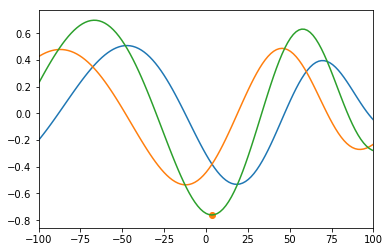

In [7]:
plt.plot(time,rh2)
plt.plot(time,rh1)
plt.plot(time,rh)
plt.scatter(time[3870],rh[3870])
plt.scatter(time[895],rh[895])
plt.xlim(-100,100)

In [8]:
print(time[3870],rh[3870])

5001.4468251329 -0.0212304953305349


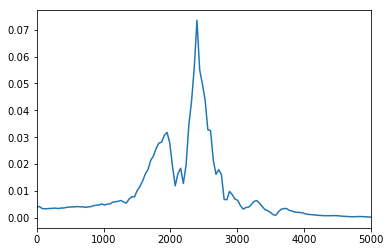

In [9]:
fq,fd,tim,dat=analyze(rh,time,2.4)
plt.plot(fq*Frequency,fd)
plt.xlim(0,5000)
plt.show()

Analysis and Plotting

data/ALF2-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


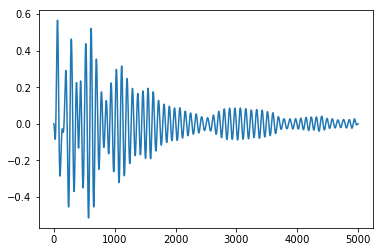

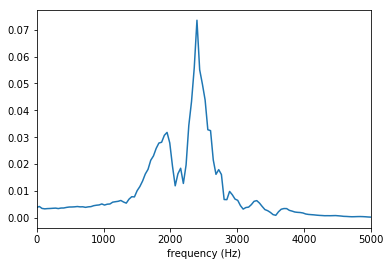

data/ALF2-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


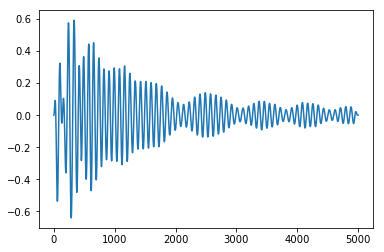

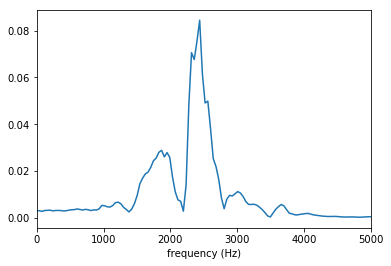

data/ALF2-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


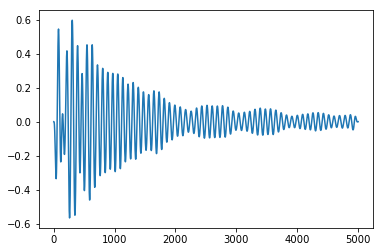

data/ALF2-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


data/ALF2-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


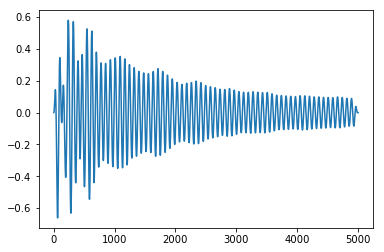

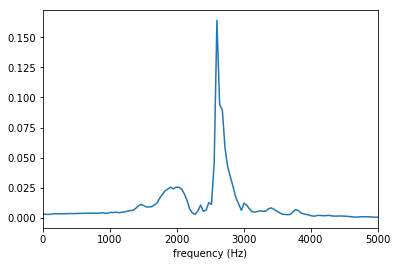

data/ALF2-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


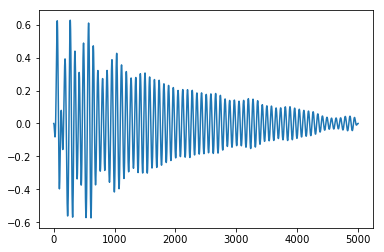

data/ALF2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


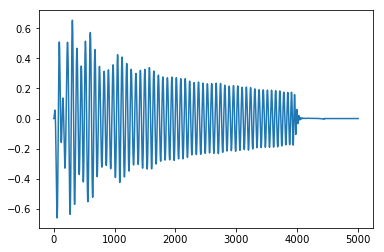

data/ALF2-q10-M1375.h_l2_m2.r500.t-1500_3500.dat


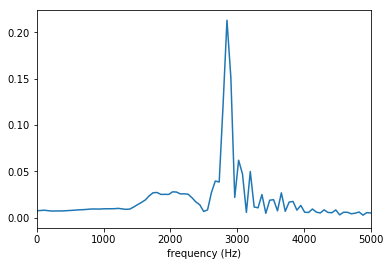

data/ALF2-q10-M1400.h_l2_m2.r500.t-1500_3000.dat


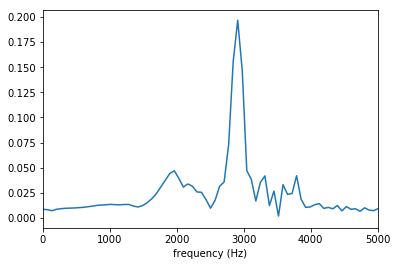

data/ALF2-q10-M1500.h_l2_m2.r500.t-1500_500.dat


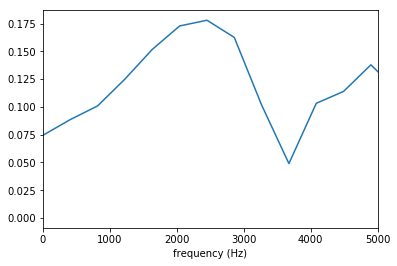

data/APR4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


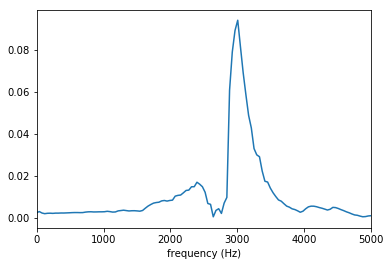

data/APR4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


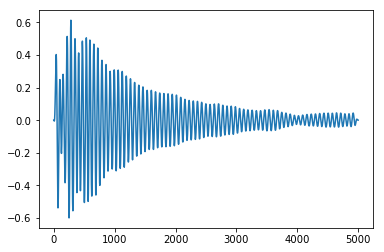

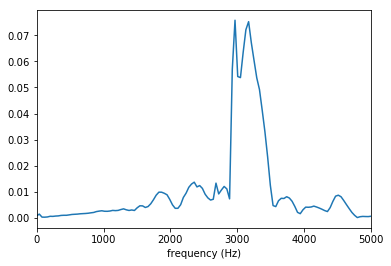

data/APR4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


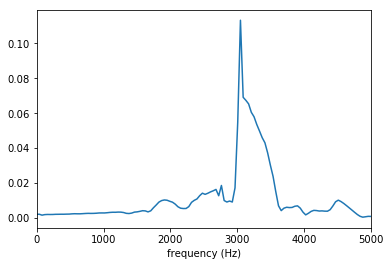

data/APR4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


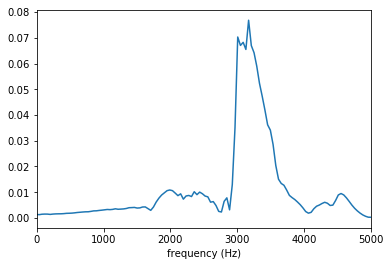

data/APR4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


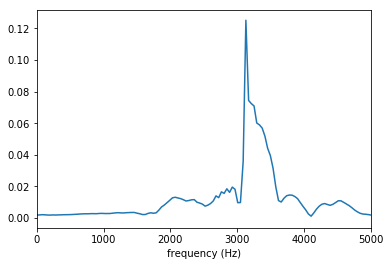

data/APR4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


data/APR4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


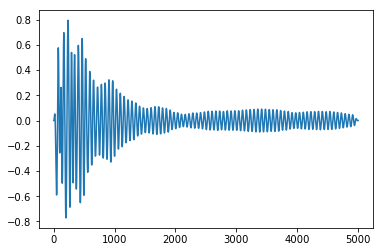

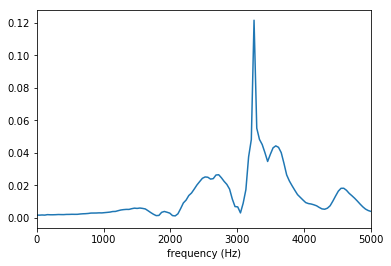

data/APR4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat


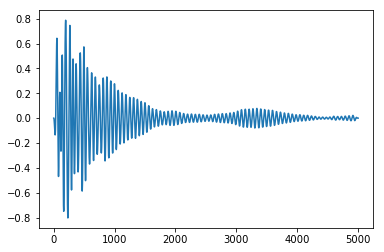

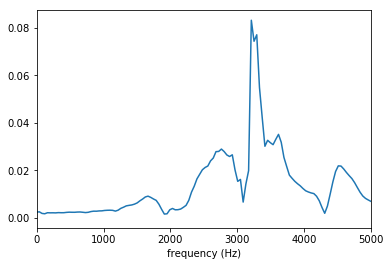

data/APR4-q10-M1400.h_l2_m2.r500.t-1500_5000.dat


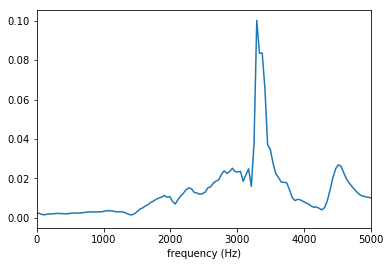

data/APR4-q10-M1500.h_l2_m2.r500.t-1500_1000.dat


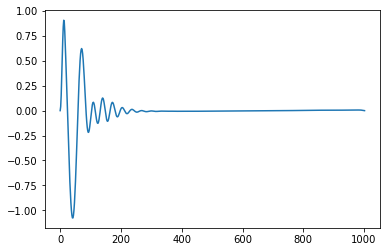

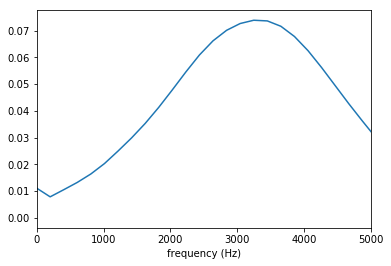

data/GAM2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


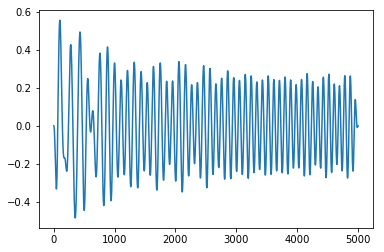

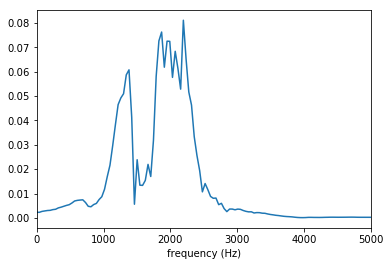

data/GAM2-q10-M1375.h_l2_m2.r500.t-1500_5000.dat


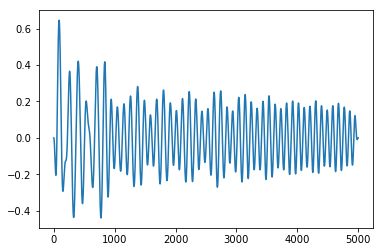

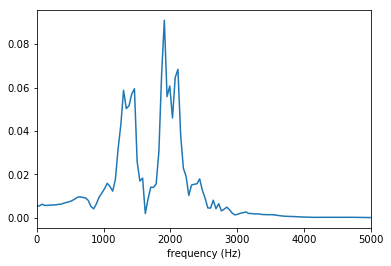

data/GAM2-q10-M1400.h_l2_m2.r500.t-1500_5000.dat


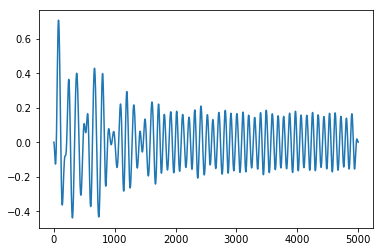

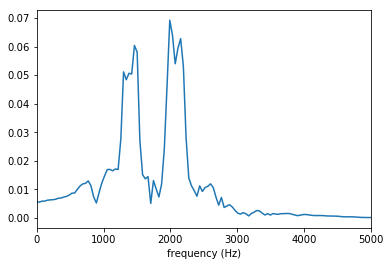

data/GAM2-q10-M1425.h_l2_m2.r500.t-1500_5000.dat


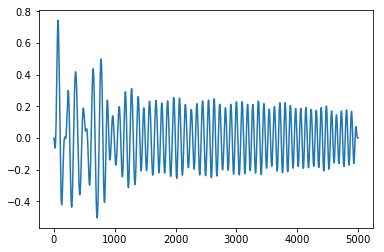

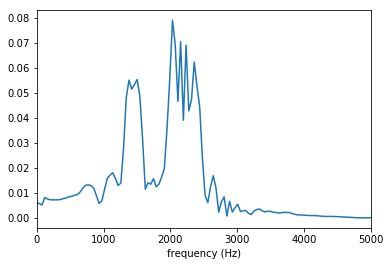

data/GAM2-q10-M1450.h_l2_m2.r500.t-1500_5000.dat


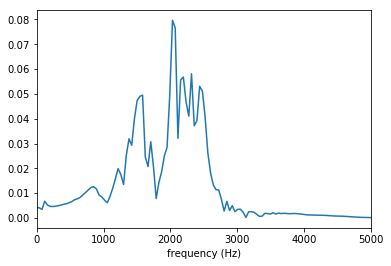

data/GNH3-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


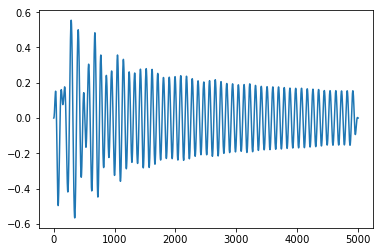

data/GNH3-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


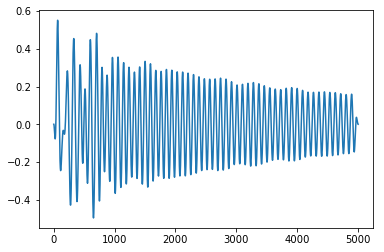

data/GNH3-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


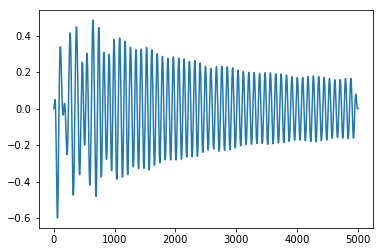

data/GNH3-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


data/GNH3-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


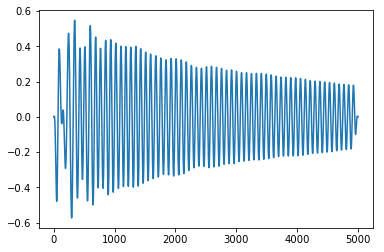

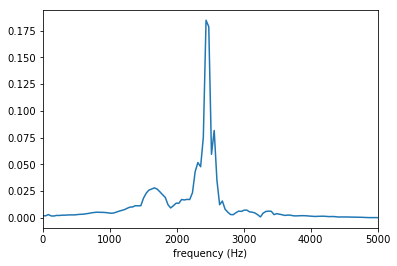

data/GNH3-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


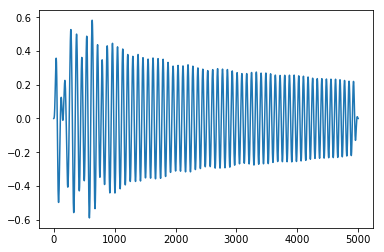

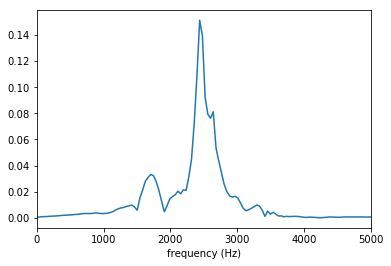

data/GNH3-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


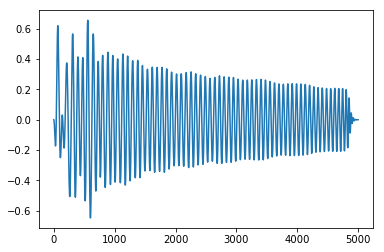

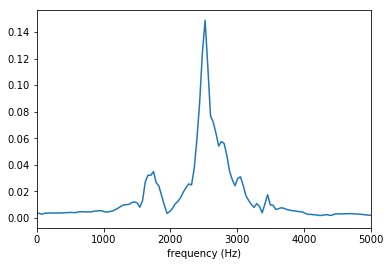

data/GNH3-q10-M1375.h_l2_m2.r500.t-1500_3000.dat


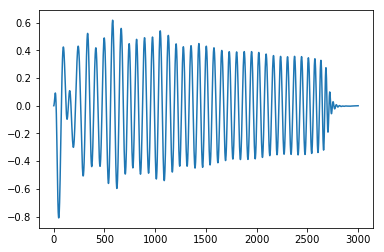

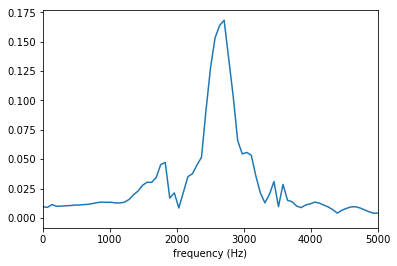

data/GNH3-q10-M1400.h_l2_m2.r500.t-1500_2500.dat


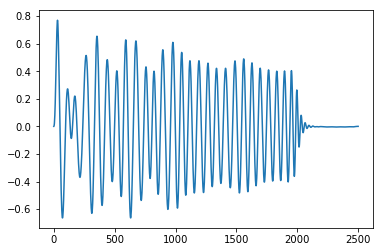

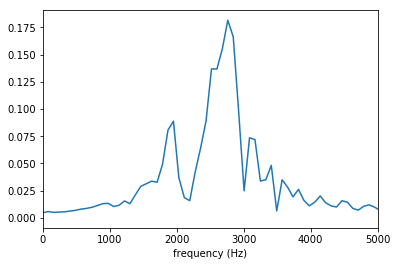

data/GNH3-q10-M1500.h_l2_m2.r500.t-1500_2000.dat


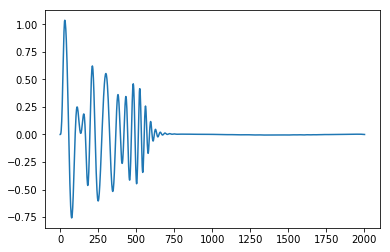

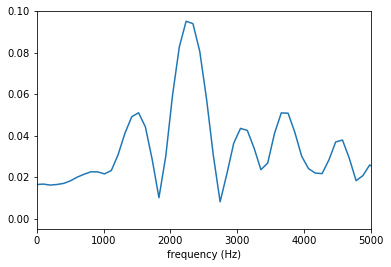

data/GNH3-q08-M1275.h_l2_m2.r500.t-1500_5000.dat


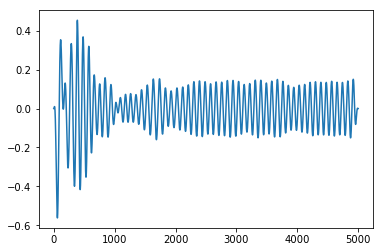

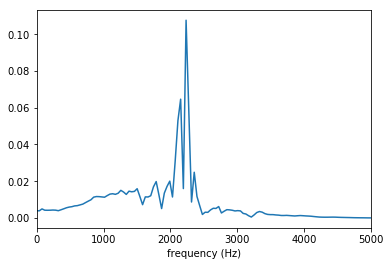

data/GNH3-q09-M1300.h_l2_m2.r500.t-1500_5000.dat


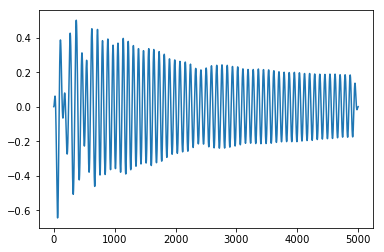

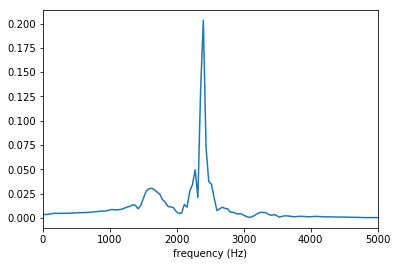

data/H4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


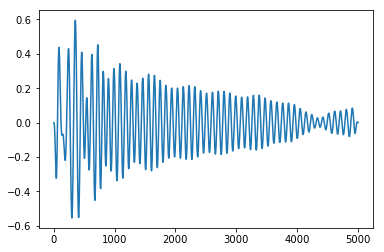

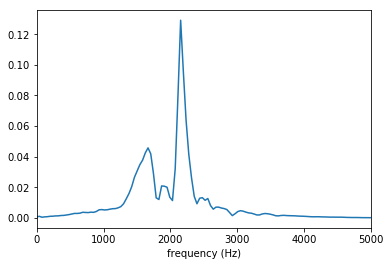

data/H4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


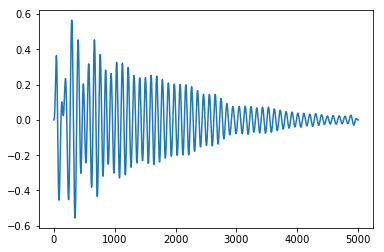

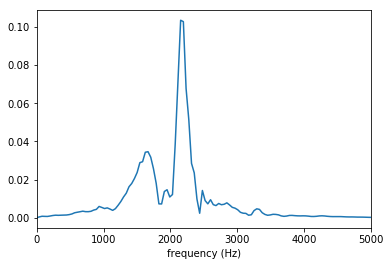

data/H4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


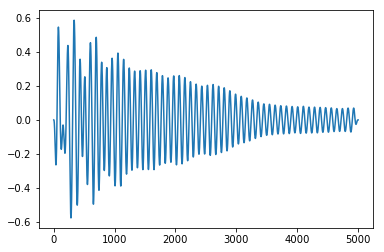

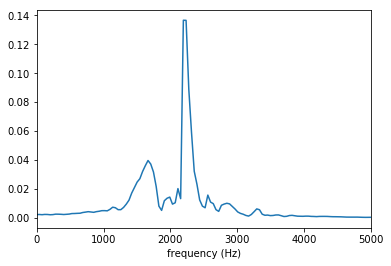

data/H4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


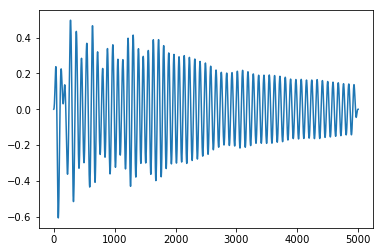

data/H4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


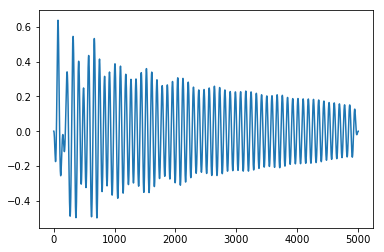

data/H4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


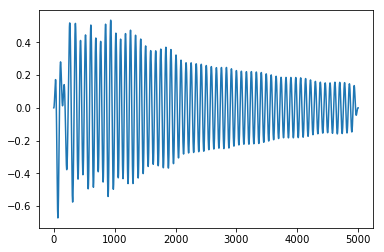

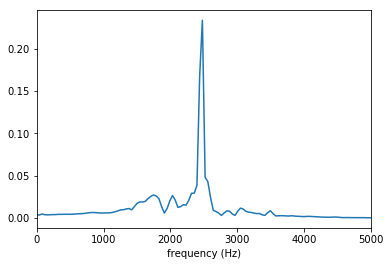

data/H4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


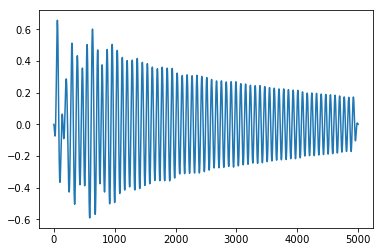

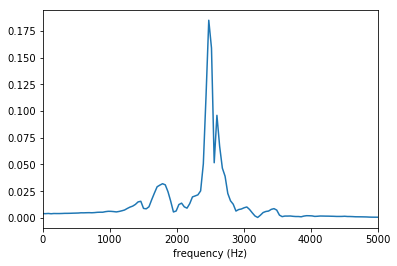

data/H4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat


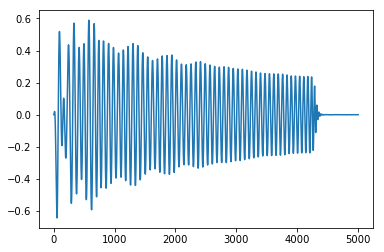

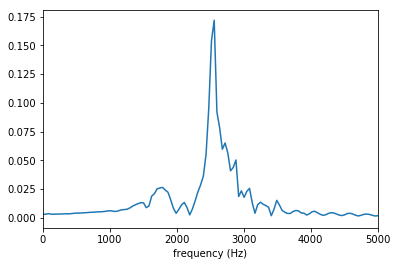

data/H4-q10-M1400.h_l2_m2.r500.t-1500_3500.dat


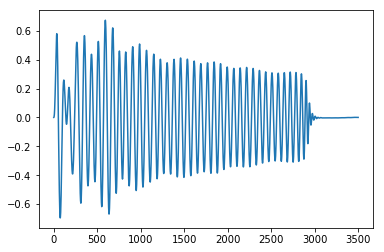

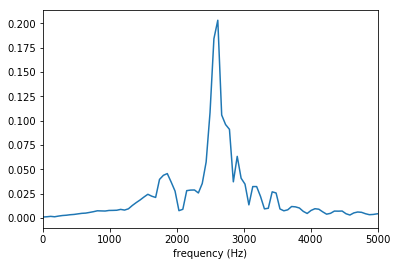

data/H4-q10-M1500.h_l2_m2.r500.t-1500_2000.dat


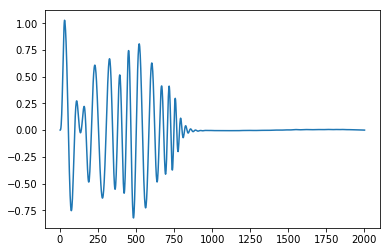

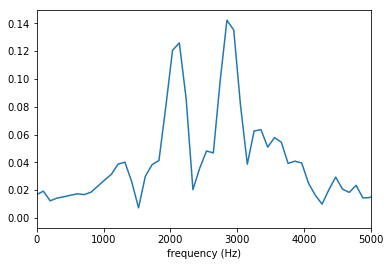

data/SLy-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


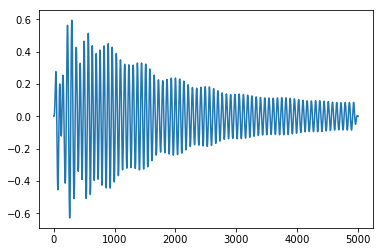

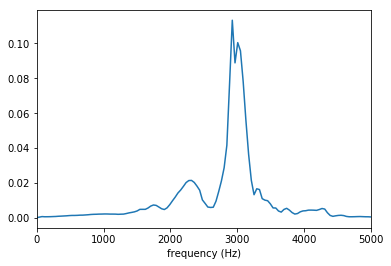

data/SLy-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


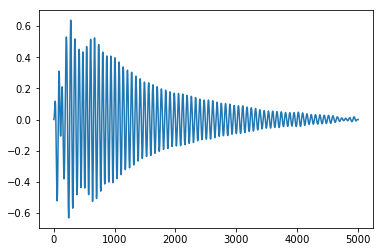

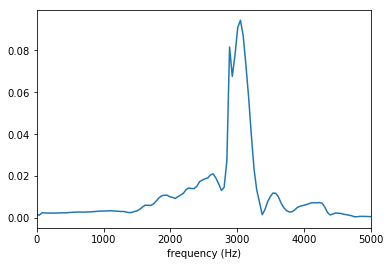

data/SLy-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


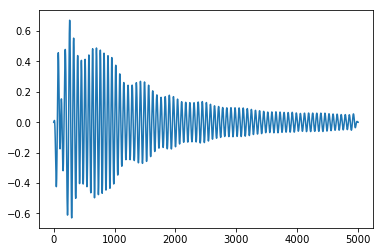

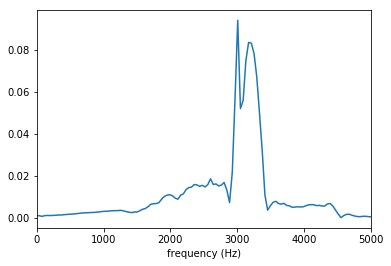

data/SLy-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


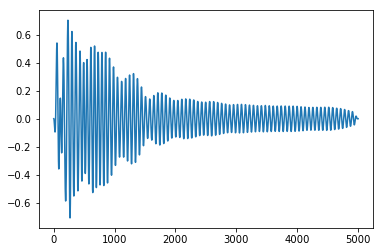

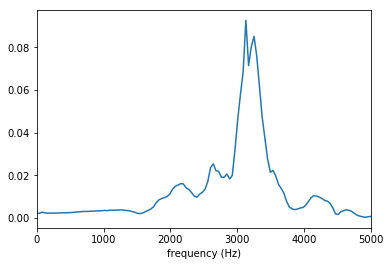

data/SLy-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


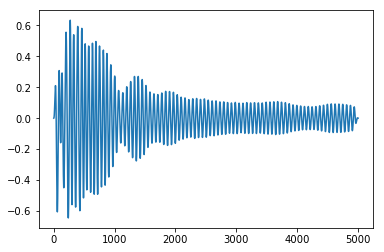

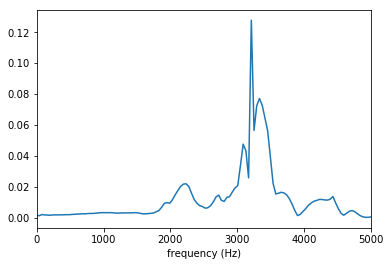

data/SLy-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


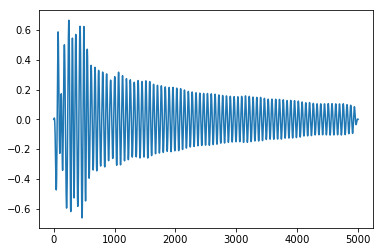

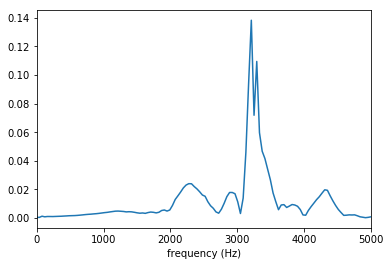

data/SLy-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


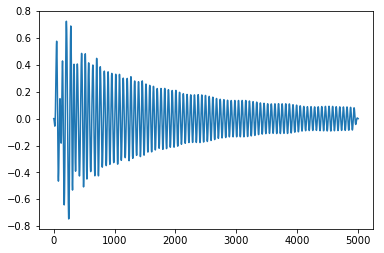

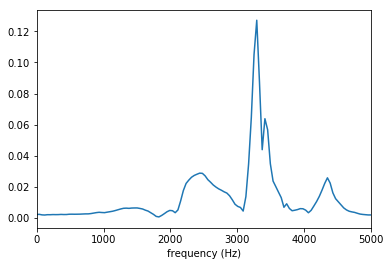

data/SLy-q10-M1375.h_l2_m2.r500.t-1500_2000.dat


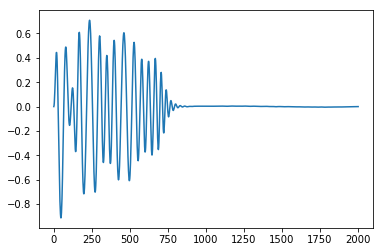

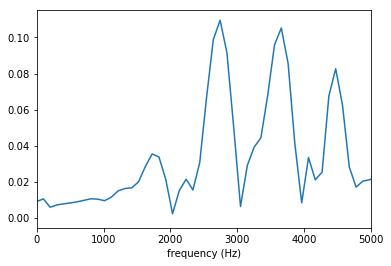

data/SLy-q10-M1400.h_l2_m2.r500.t-1500_1000.dat


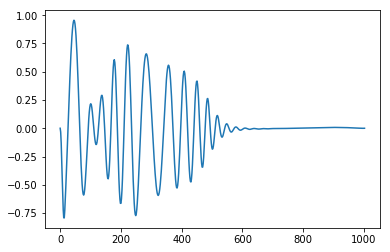

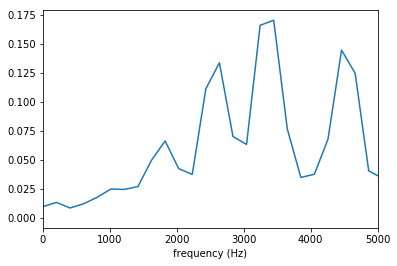

data/SLy-q10-M1500.h_l2_m2.r500.t-1500_1000.dat


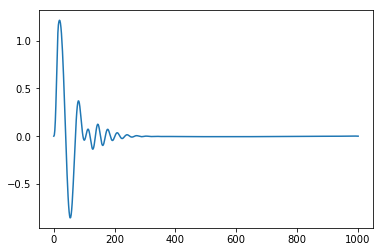

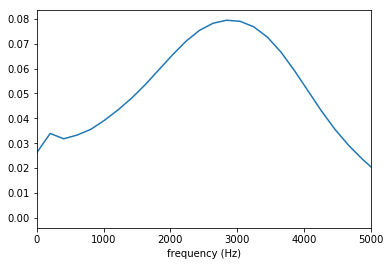

data/SLy-q08-M1275.h_l2_m2.r500.t-1500_5000.dat


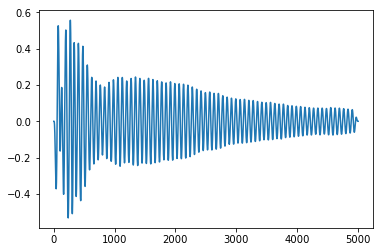

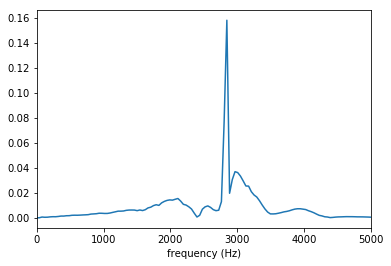

data/SLy-q09-M1300.h_l2_m2.r500.t-1500_5000.dat


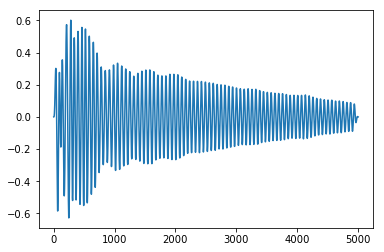

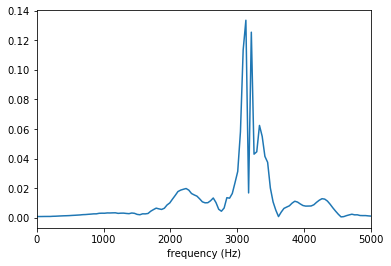

In [10]:

for eos in EOS:
    
    for q in Q:
        for mas in MASS:
            for p in point:
                name='data/'+eos+'-q'+q+'-M'+mas+'.h_l2_m2.r500.t-1500_'+p+'.dat'
    
                try:
                    
                    f=open(name,'r')
                    print(name)
                    lines=f.readlines()[23:]

                    result1=[]
                    result2=[]
                    result3=[]
                    for x in lines:
                        for i in range(len(x.split(' '))):
                            if x.split(' ')[i]!='':
                                result1.append(x.split(' ')[i])
                                for j in range(i+1,len(x.split(' '))): 
                                    if x.split(' ')[j]!='':
                                        result2.append(x.split(' ')[j])
                                        for k in range(j+1,len(x.split(' '))):
                                            if x.split(' ')[k]!='':
                                                result3.append(x.split(' ')[k])
                                                break
                                        break
                                break
                    
                    time=[float(i) for i in result1]
                    rh1=[float(i) for i in result2]
                    rh2=[float(i) for i in result3]

                    rh=np.empty(len(rh1))
                    for i in range(len(rh1)):
                        rh[i]=rh1[i]+rh2[i]
                    
                    
                    
                    bn=open('data/BNS/GNH3-q08-M1275.bns')
                    blines=bn.readlines()
                    exec(blines[8])
                    exec(blines[9])
                    mass=mass1+mass2
                    fq,fd,tim,dat=analyze(rh,time,mass)
                    
                    plt.plot(tim,dat)
                    plt.show()
                    
                    plt.plot(fq*Frequency,fd)
                    plt.xlim(0,5000)
                    plt.xlabel('frequency (Hz)')
                    plt.show()
                    
                except OSError:
                    pass



data/ALF2-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


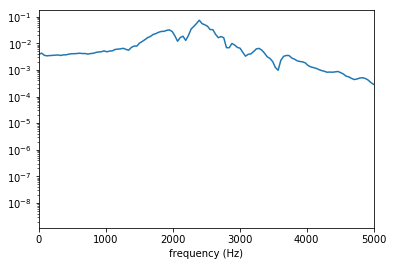

data/ALF2-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


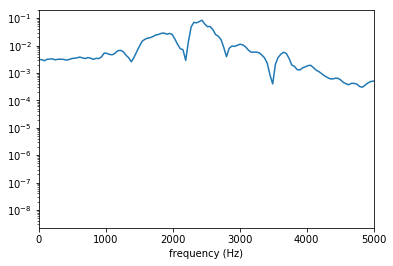

data/ALF2-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


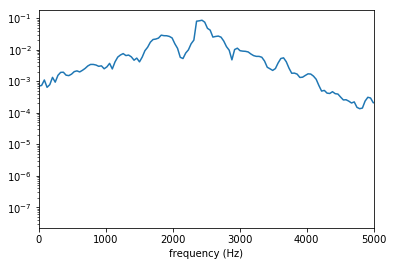

data/ALF2-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


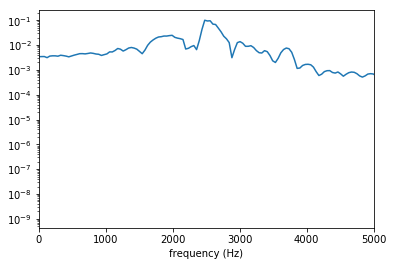

data/ALF2-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


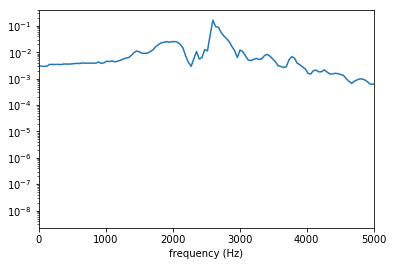

data/ALF2-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


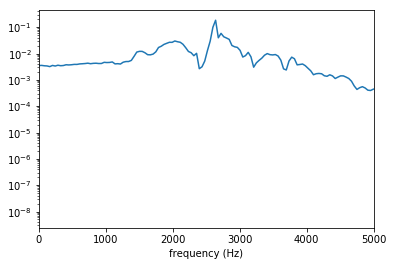

data/ALF2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


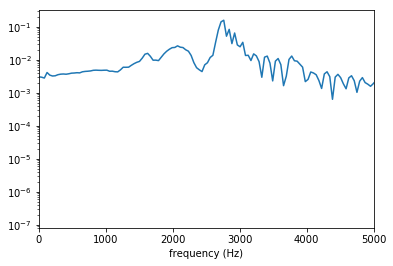

data/ALF2-q10-M1375.h_l2_m2.r500.t-1500_3500.dat


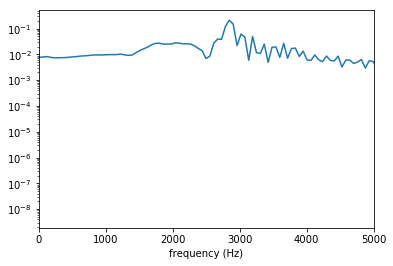

data/ALF2-q10-M1400.h_l2_m2.r500.t-1500_3000.dat


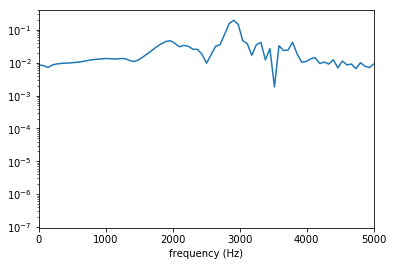

data/ALF2-q10-M1500.h_l2_m2.r500.t-1500_500.dat


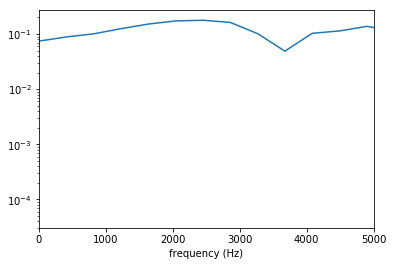

data/APR4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


data/APR4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


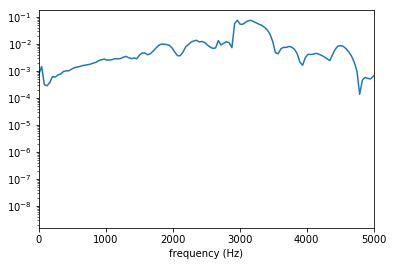

data/APR4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


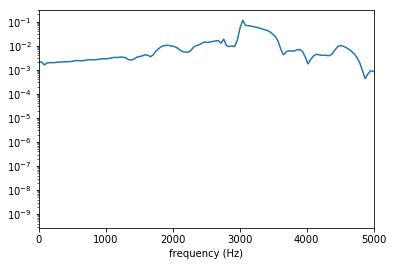

data/APR4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


data/APR4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


data/APR4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


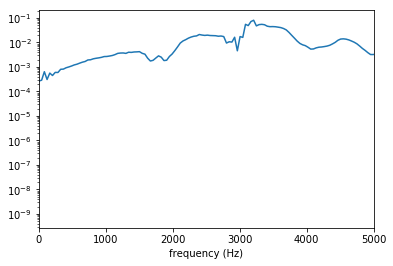

data/APR4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


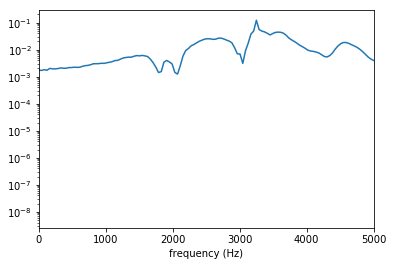

data/APR4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat


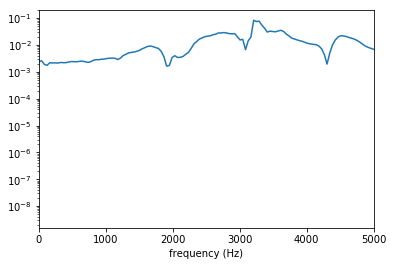

data/APR4-q10-M1400.h_l2_m2.r500.t-1500_5000.dat


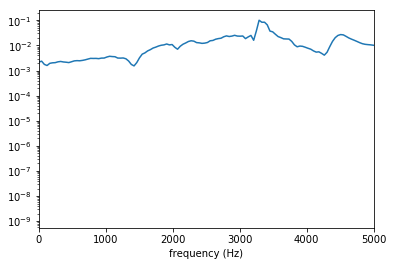

data/APR4-q10-M1500.h_l2_m2.r500.t-1500_1000.dat


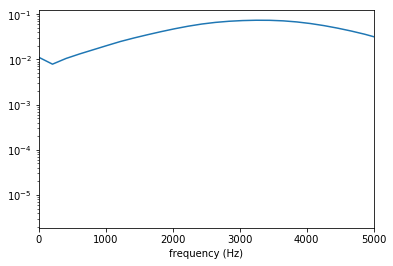

data/GAM2-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


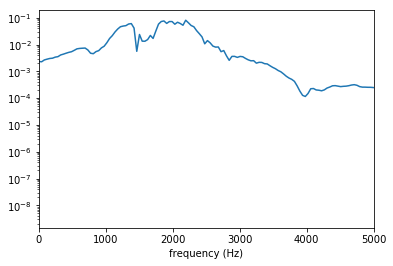

data/GAM2-q10-M1375.h_l2_m2.r500.t-1500_5000.dat


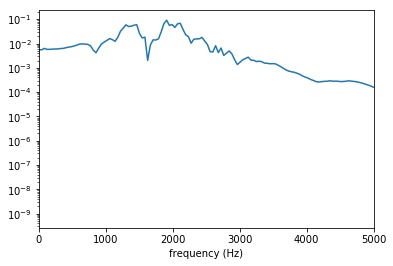

data/GAM2-q10-M1400.h_l2_m2.r500.t-1500_5000.dat


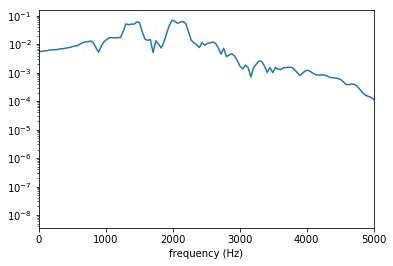

data/GAM2-q10-M1425.h_l2_m2.r500.t-1500_5000.dat


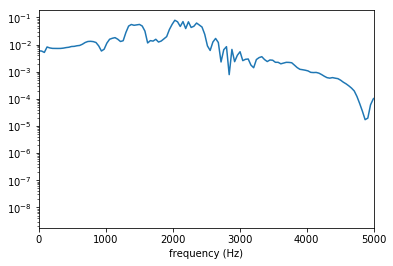

data/GAM2-q10-M1450.h_l2_m2.r500.t-1500_5000.dat


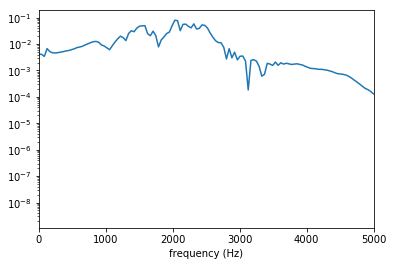

data/GNH3-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


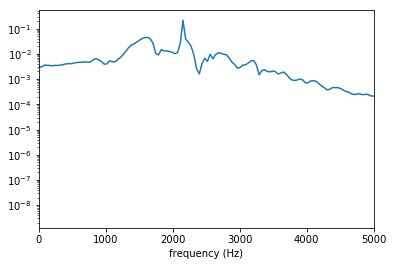

data/GNH3-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


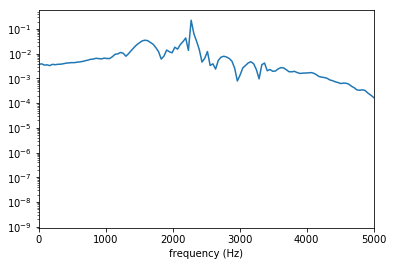

data/GNH3-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


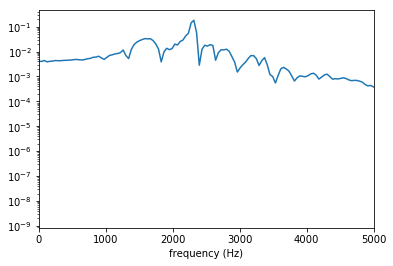

data/GNH3-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


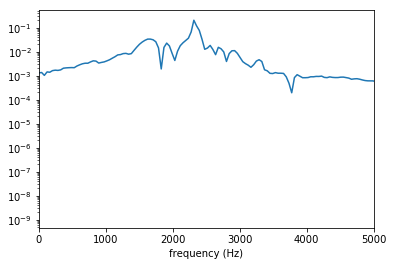

data/GNH3-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


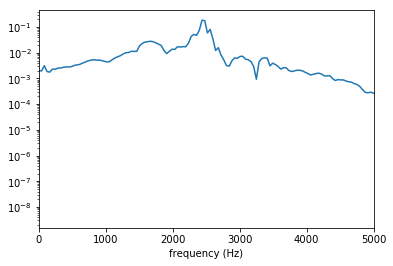

data/GNH3-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


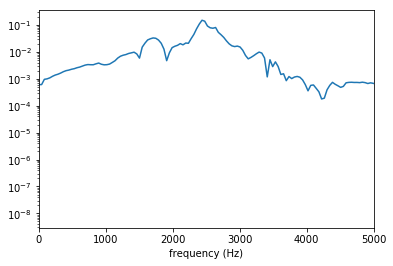

data/GNH3-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


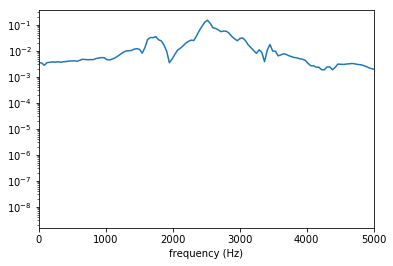

data/GNH3-q10-M1375.h_l2_m2.r500.t-1500_3000.dat


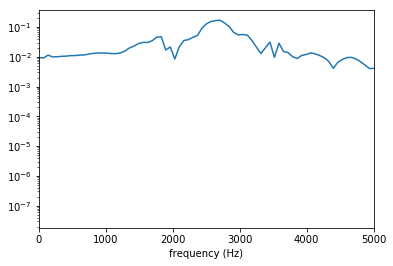

data/GNH3-q10-M1400.h_l2_m2.r500.t-1500_2500.dat


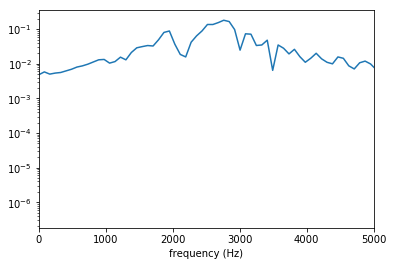

data/GNH3-q10-M1500.h_l2_m2.r500.t-1500_2000.dat


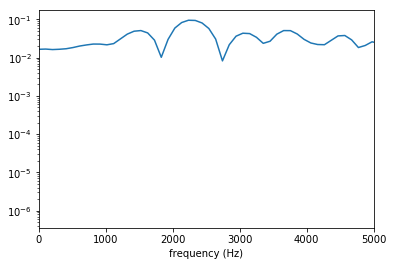

data/GNH3-q08-M1275.h_l2_m2.r500.t-1500_5000.dat


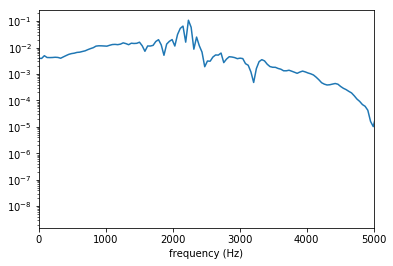

data/GNH3-q09-M1300.h_l2_m2.r500.t-1500_5000.dat


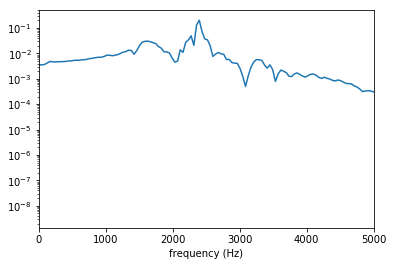

data/H4-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


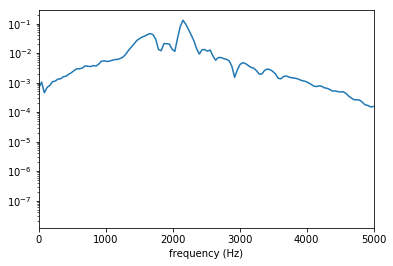

data/H4-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


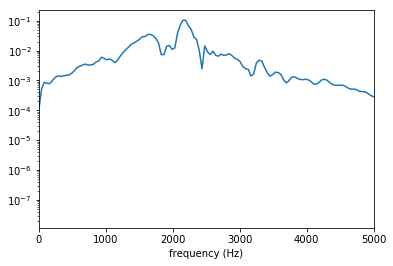

data/H4-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


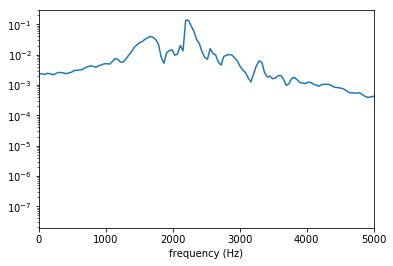

data/H4-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


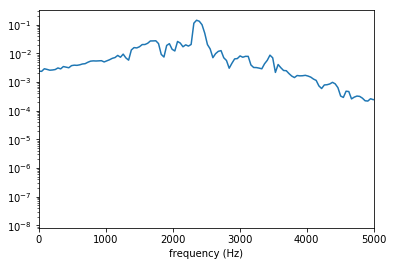

data/H4-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


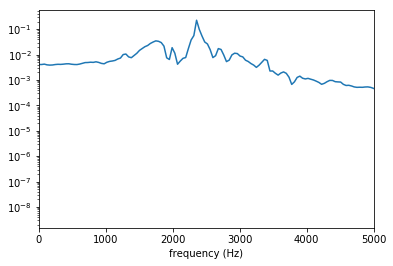

data/H4-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


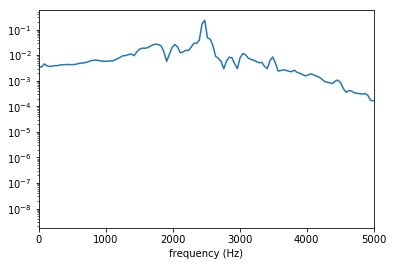

data/H4-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


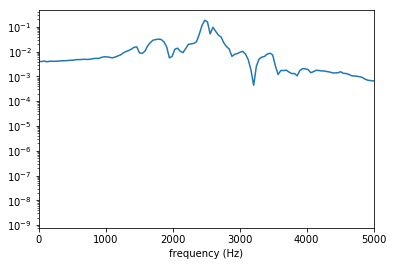

data/H4-q10-M1375.h_l2_m2.r500.t-1500_5000.dat


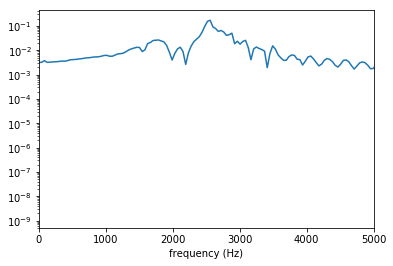

data/H4-q10-M1400.h_l2_m2.r500.t-1500_3500.dat


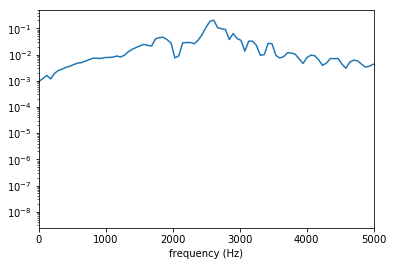

data/H4-q10-M1500.h_l2_m2.r500.t-1500_2000.dat


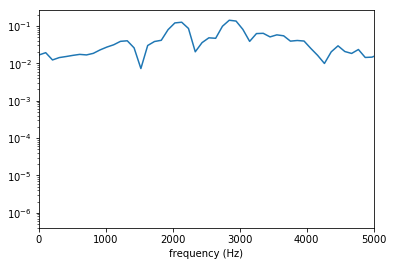

data/SLy-q10-M1200.h_l2_m2.r500.t-1500_5000.dat


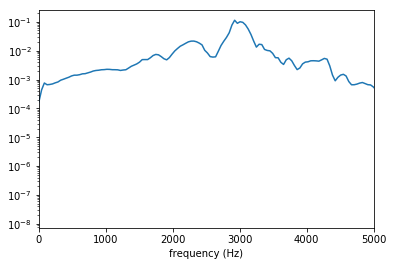

data/SLy-q10-M1225.h_l2_m2.r500.t-1500_5000.dat


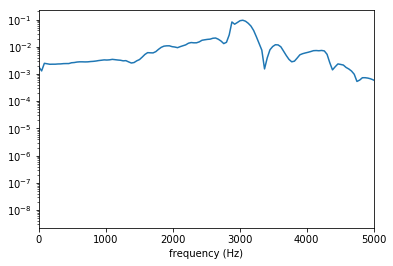

data/SLy-q10-M1250.h_l2_m2.r500.t-1500_5000.dat


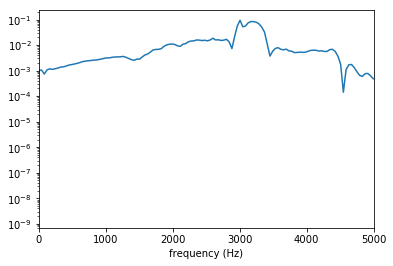

data/SLy-q10-M1275.h_l2_m2.r500.t-1500_5000.dat


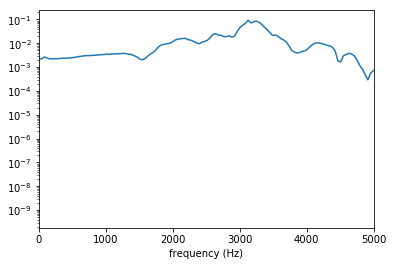

data/SLy-q10-M1300.h_l2_m2.r500.t-1500_5000.dat


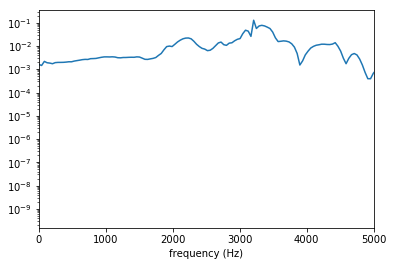

data/SLy-q10-M1325.h_l2_m2.r500.t-1500_5000.dat


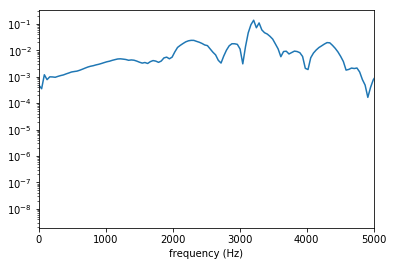

data/SLy-q10-M1350.h_l2_m2.r500.t-1500_5000.dat


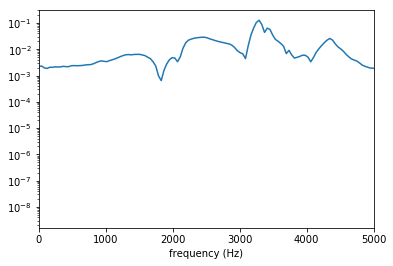

data/SLy-q10-M1375.h_l2_m2.r500.t-1500_2000.dat


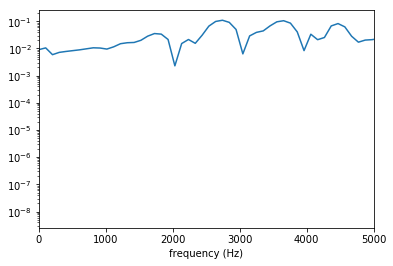

data/SLy-q10-M1400.h_l2_m2.r500.t-1500_1000.dat


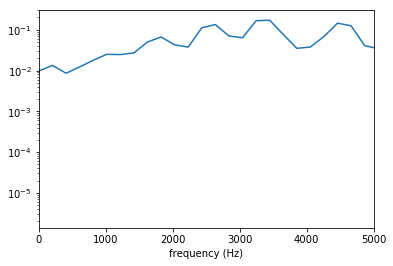

data/SLy-q10-M1500.h_l2_m2.r500.t-1500_1000.dat


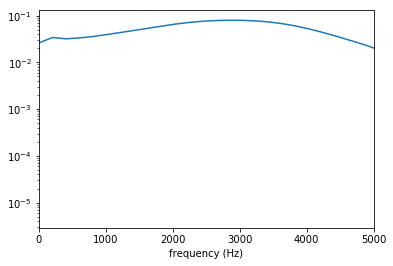

data/SLy-q08-M1275.h_l2_m2.r500.t-1500_5000.dat


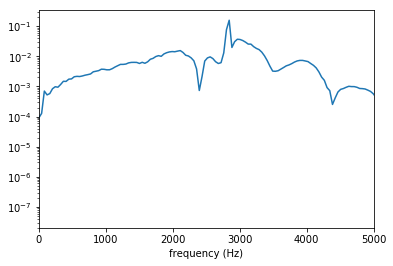

data/SLy-q09-M1300.h_l2_m2.r500.t-1500_5000.dat


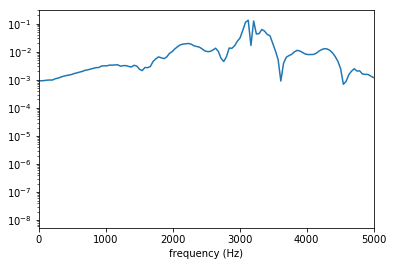

In [11]:

for eos in EOS:
    
    for q in Q:
        for mas in MASS:
            for p in point:
                name='data/'+eos+'-q'+q+'-M'+mas+'.h_l2_m2.r500.t-1500_'+p+'.dat'
    
                try:
                    
                    f=open(name,'r')
                    print(name)
                    lines=f.readlines()[23:]

                    result1=[]
                    result2=[]
                    result3=[]
                    for x in lines:
                        for i in range(len(x.split(' '))):
                            if x.split(' ')[i]!='':
                                result1.append(x.split(' ')[i])
                                for j in range(i+1,len(x.split(' '))): 
                                    if x.split(' ')[j]!='':
                                        result2.append(x.split(' ')[j])
                                        for k in range(j+1,len(x.split(' '))):
                                            if x.split(' ')[k]!='':
                                                result3.append(x.split(' ')[k])
                                                break
                                        break
                                break
                    
                    time=[float(i) for i in result1]
                    rh1=[float(i) for i in result2]
                    rh2=[float(i) for i in result3]

                    rh=np.empty(len(rh1))
                    for i in range(len(rh1)):
                        rh[i]=rh1[i]+rh2[i]
                    
                    
                    
                    bn=open('data/BNS/GNH3-q08-M1275.bns')
                    blines=bn.readlines()
                    exec(blines[8])
                    exec(blines[9])
                    mass=mass1+mass2
                    fq,fd,tim,dat=analyze(rh,time,mass)
                    
                    
                    
                    plt.plot(fq*Frequency,fd)
                    plt.xlim(0,5000)
                    plt.yscale('log')
                    plt.xlabel('frequency (Hz)')
                    plt.show()
                    
                except OSError:
                    pass

